In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date
df_demand_log

,DemandID,Demand Request Date,Mix,Jar Size (vol. ounces),State,Quantity,Earliest Delivery Date,Preferred Delivery Date,Latest Delivery Date
0,1,2021-01-01,Apple-Mango,8,Maryland,1,2021-01-01,2021-01-04,2021-01-07
1,2,2021-01-01,Blueberry-Lemon,32,Kentucky,1,2021-01-04,2021-01-06,2021-01-09
2,3,2021-01-01,Orange-Passionfruit,16,Minnesota,1,2021-01-07,2021-01-10,2021-01-11
3,4,2021-01-01,Orange-Passionfruit,16,California,1,2021-01-07,2021-01-11,2021-01-14
4,5,2021-01-01,Orange-Passionfruit,32,Louisiana,1,2021-01-01,2021-01-04,2021-01-10
...,...,...,...,...,...,...,...,...,...
835374,835375,2023-12-31,Orange-Passionfruit,32,Arizona,1,2023-12-31,2024-01-05,2024-01-13
835375,835376,2023-12-31,Peach-Raspberry,32,California,1,2023-12-31,2024-01-01,2024-01-01
835376,835377,2023-12-31,Blueberry-Lemon,16,Arizona,1,2023-12-31,2024-01-02,2024-01-02
835377,835378,2023-12-31,Strawberry-Kiwi,8,California,1,2023-12-31,2024-01-03,2024-01-03


In [25]:
# Create a pivot table with references to plot later
pivot_demand_request_date = df_demand_log.pivot_table(index='Demand Request Date', values='Quantity', aggfunc='sum')
pivot_demand_request_date['Day of Week'] = pivot_demand_request_date.index.day_name()
pivot_demand_request_date['Week Number'] = (pivot_demand_request_date.index - pivot_demand_request_date.index.min()).days // 7 + 1
pivot_demand_request_date['Month Number'] = (pivot_demand_request_date.index.year - pivot_demand_request_date.index.min().year) * 12 + pivot_demand_request_date.index.month
pivot_demand_request_date


,Quantity,Day of Week,Week Number,Month Number
Demand Request Date,,,,
2021-01-01,90,Friday,1,1
2021-01-02,420,Saturday,1,1
2021-01-03,178,Sunday,1,1
2021-01-04,16,Monday,1,1
2021-01-05,294,Tuesday,1,1
...,...,...,...,...
2023-12-27,496,Wednesday,156,36
2023-12-28,574,Thursday,156,36
2023-12-29,3568,Friday,157,36


The code below shows that the November Cyber Week promotion brings in a lot of demand. They must also have a promotion around May, and possibly July.

In [21]:
# Find the top 20 demand request dates with the highest quantity
top_20_demand_dates = pivot_demand_request_date.nlargest(20, 'Quantity')
top_20_demand_dates

,Quantity,Day of Week,Week Number,Month Number
Demand Request Date,,,,
2023-11-24,33324,Friday,152,35
2022-11-25,22162,Friday,100,23
2023-11-27,15975,Monday,152,35
2023-05-22,7279,Monday,125,29
2021-11-26,7244,Friday,48,11
2023-12-18,7030,Monday,155,36
2023-07-03,6902,Monday,131,31
2022-11-28,6048,Monday,100,23
2023-10-30,5959,Monday,148,34


Here we are looking at the day of week seasonality. Friday and Monday have the most.

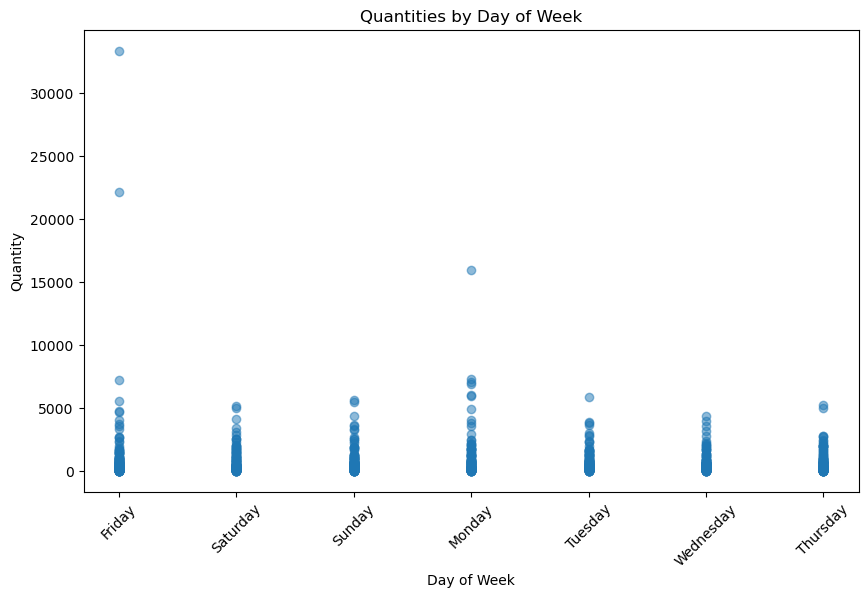

In [22]:
# Plot the days of week with their quantities on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pivot_demand_request_date['Day of Week'], pivot_demand_request_date['Quantity'], alpha=0.5)
plt.title('Quantities by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

This code first replaces the three outliers above with quantities similar to the other values, then takes the average of all days of the week. Still, Friday and Monday have the most demand, while Wednesday and Thursday have the least. 

In [38]:
pivot_demand_request_date_copy = pivot_demand_request_date.copy()
# Set the highest three values for pivot_demand_request_date_copy to have quantities equal to 7200, approximately the fourth highest value
pivot_demand_request_date_copy.loc[pivot_demand_request_date_copy['Quantity'].nlargest(3).index, 'Quantity'] = 7200
pivot_avg_quantity_by_day_of_week = pivot_demand_request_date_copy.pivot_table(index='Day of Week', values='Quantity', aggfunc='mean')
pivot_avg_quantity_by_day_of_week



,Quantity
Day of Week,
Friday,871.566879
Monday,911.807692
Saturday,726.820513
Sunday,716.847134
Thursday,646.641026
Tuesday,702.333333
Wednesday,605.245161


This code makes the 

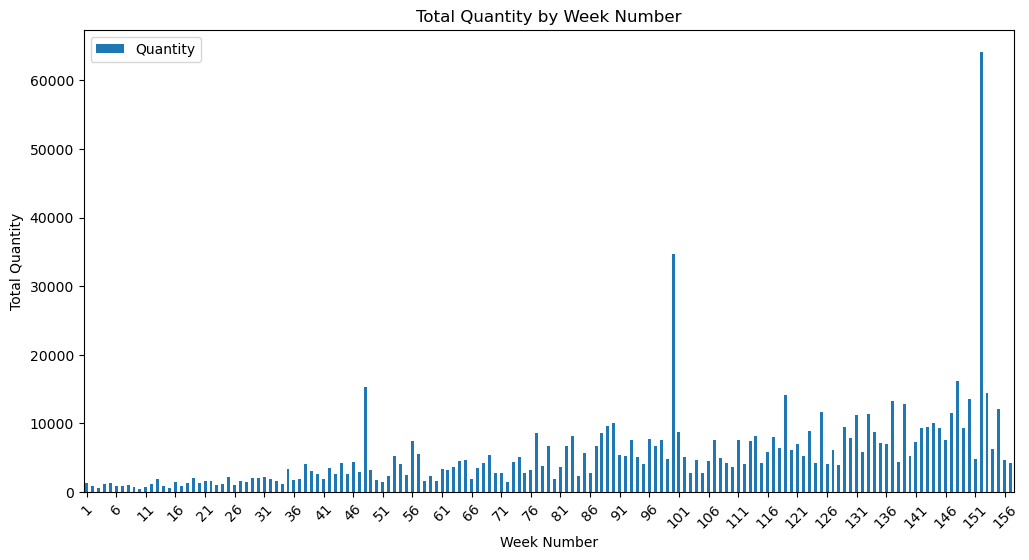

In [28]:
pivot_demand_by_week_number = pivot_demand_request_date.pivot_table(index='Week Number', values='Quantity', aggfunc='sum')
pivot_demand_by_week_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_week_number), 5), labels=range(1, len(pivot_demand_by_week_number) + 1, 5), rotation=45)
plt.show()

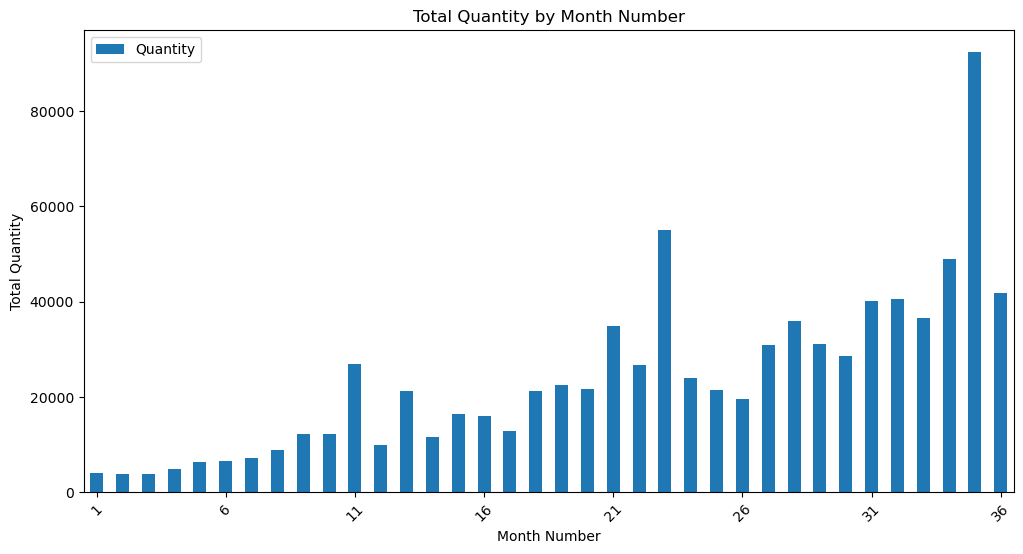

In [30]:
pivot_demand_by_month_number = pivot_demand_request_date.pivot_table(index='Month Number', values='Quantity', aggfunc='sum')
pivot_demand_by_month_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Month Number')
plt.xlabel('Month Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_month_number), 5), labels=range(1, len(pivot_demand_by_month_number) + 1, 5), rotation=45)
plt.show()